# Conceptual

__1.__ Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1, R_2,\ldots,$ the cutpoints $t_1,t_2,\ldots,$ and so forth.  
_Hint: Your result should look something like Figures 8.1 and 8.2._

In [1]:
library(ISLR2)
library(tree)
Hitters <- na.omit(Hitters)
Hitters$Salary <- round(log(Hitters$Salary),2)

Warning message in node.match(nodes, node, tree$frame$var == "<leaf>"):
“supplied nodes 7 are leaves”


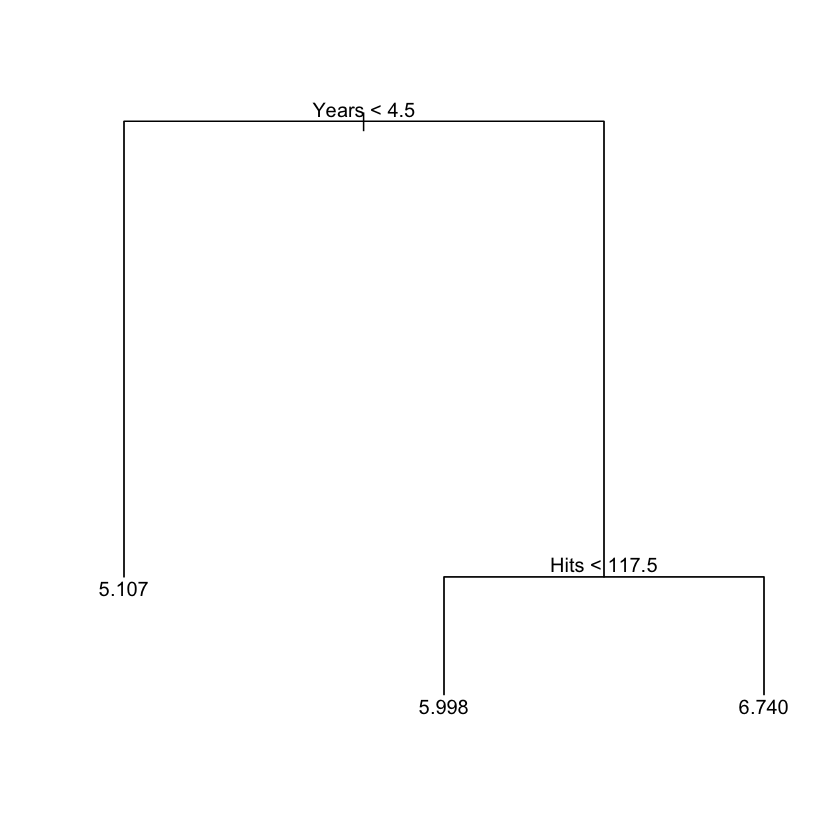

In [2]:
tree.hitters <- tree(Salary ~ Years + Hits, Hitters)
tree.hitters <- snip.tree(tree.hitters, c(2,6,7))
plot(tree.hitters)
text(tree.hitters, pretty = 0)

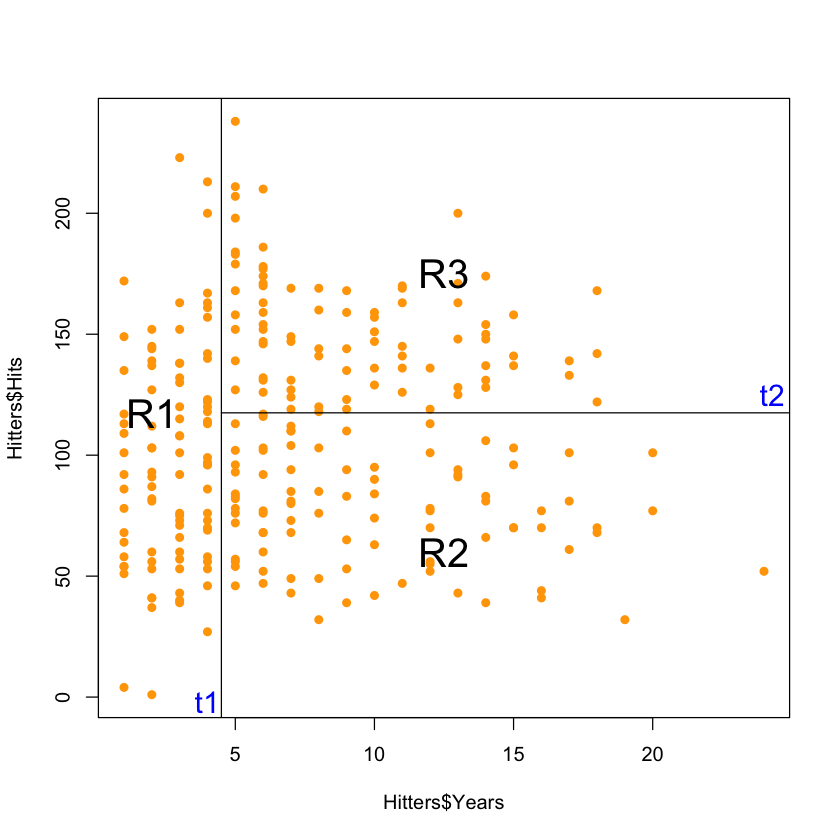

In [36]:
plot(Hitters$Years,Hitters$Hits, pch=16, col="orange")
abline(v=4.5)
lines(x=c(4.5,25),y=c(117.5,117.5))
text(2,117.5, labels="R1",cex=2)
text(12.5, 60, labels="R2", cex=2)
text(12.5, 175, labels="R3", cex=2)
text(4, -2,labels="t1", cex=1.5, col="blue")
text(24.3, 125, labels="t2", cex=1.5, col="blue")

__2.__ It is mentioned in Section 8.2.3 that boosting using depth-one trees (or _stumps_) leads to an _additive_ model: that is, a model of the form
\begin{align}
f(X) = \sum^p_{j=1} {f_j(X_j)}\mathrm{.}
\end{align}
Explain why this is the case. You can begin with (8.12) in Algorithm 8.2.

__3.__ Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$, display $\hat{p}_{m1}$, ranging from $0$ to $1$, and the $y$-axis should display the value of the Gini index, classification error, and entropy.  
_Hint: In a setting with two classes,_ $\hat{p}_{m1} = 1 - \hat{p}_{m2}$. _You could make this plot by hand, but it will be much easier to make in `R`_.